# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import altair as alt
from scipy.integrate import odeint
import plotly.express as px

import calendar

# Vaccination Projection

### Differential equations

In [2]:
import pandas as pd
import numpy as np

def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [3]:
# Total population, N.
N = 25000000
# Initial number of infected and recovered individuals, I0 and R0.
I0, R0 = 1, 0
# Everyone else, S0, is susceptible to infection initially.
S0 = N - I0 - R0
# Contact rate, beta, and mean recovery rate, gamma, (in 1/days).
beta, gamma = 0.10, 1./22 
# A grid of time points (in days)
t_max = 700
dt = 1
t = np.linspace(0, t_max, t_max + 1)

# Initial conditions vector
y0 = S0, I0, R0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

results = pd.DataFrame({'Eligible for Vaccination': S, 'Ignore': I, 'Registered for Vaccination': R} )
results['Day'] = 1 + results.index
results['Date']=pd.date_range(start='6/3/2020', periods= t_max+ 1)

### Vaccine Supply Information

In [4]:
data_file='DoseNew.xlsx'

# Pfizer
dose_pfizer = pd.read_excel(data_file, sheet_name='Pfizer') 
dose_pfizer['Vaccine'] = 'Pfizer'

# Sinovac
dose_sinovac = pd.read_excel(data_file, sheet_name='Sinovac') 
dose_sinovac['Vaccine'] = 'Sinovac'

# Cansino
dose_cansino = pd.read_excel(data_file, sheet_name='Cansino') 
dose_cansino['Vaccine'] = 'Cansino'

# AZ
dose_AZ = pd.read_excel(data_file, sheet_name='AZ') 
dose_AZ['Vaccine'] = 'AZ'

# Sputnik
dose_Sputnik = pd.read_excel(data_file, sheet_name='Sputnik') 
dose_Sputnik['Vaccine'] = 'Sputnik'

# Covax
dose_Covax = pd.read_excel(data_file, sheet_name='Covax') 
dose_Covax['Vaccine'] = 'Covax'

df = pd.concat([dose_pfizer,dose_sinovac,dose_cansino,dose_AZ,dose_Sputnik,dose_Covax],0) 
df = df.drop(['Date'],1)
df=df.dropna() 
df['Week']=df['Week'].astype(int)


In [5]:
df_1=df.copy()
df_1['Month_Week']= df_1['Month'].astype(str)   + "-w" + df_1['Week'].astype(str)  
df_1.dtypes
df_1

,Month,Week,Dose,Vaccine,Month_Week
0,Feb,4,312390.0,Pfizer,Feb-w4
1,Mar,1,208260.0,Pfizer,Mar-w1
2,Mar,2,147420.0,Pfizer,Mar-w2
3,Mar,3,83070.0,Pfizer,Mar-w3
4,Mar,4,124020.0,Pfizer,Mar-w4
...,...,...,...,...,...
3,May,4,173400.0,Covax,May-w4
4,Jun,1,173400.0,Covax,Jun-w1
5,Jun,2,173400.0,Covax,Jun-w2
6,Jun,3,173400.0,Covax,Jun-w3


# Plot - Monthly Vaccine Dose

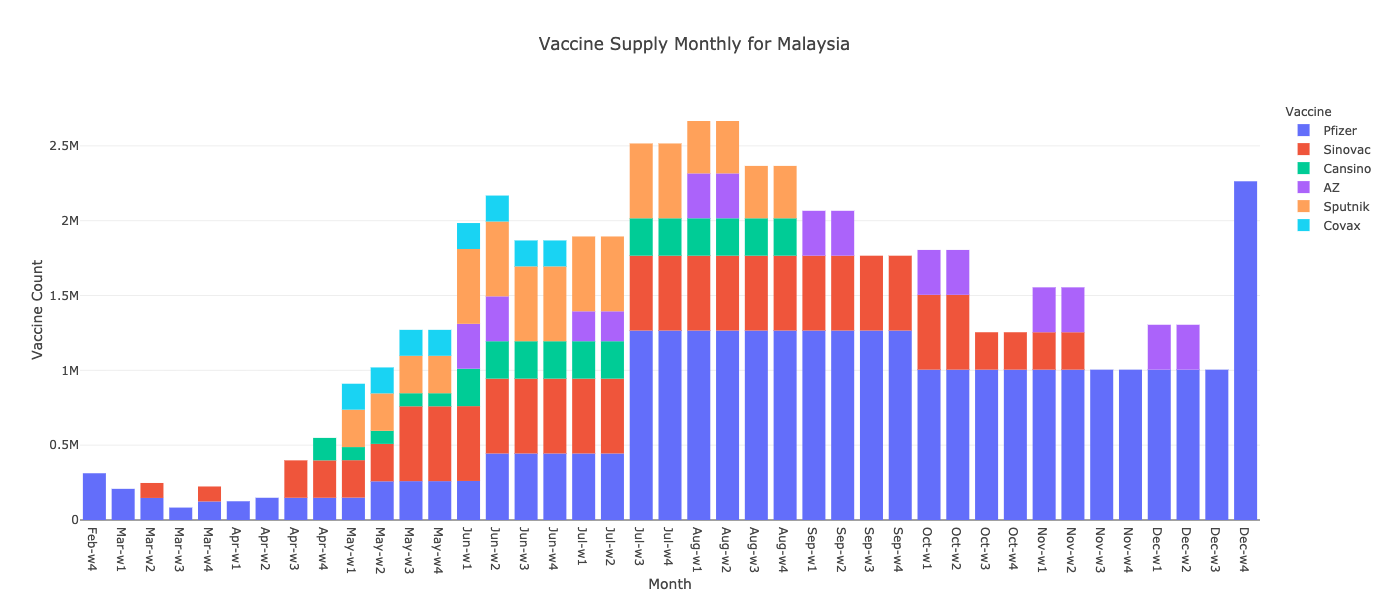

In [7]:
fig = px.bar(df_1, x="Month_Week", color="Vaccine",
             y='Dose',
             title="A Grouped Bar Chart With Plotly Express in Python",  
             barmode='stack',
             height=600         
            )

fig.update_layout(title = "Vaccine Supply Monthly for Malaysia",
     xaxis_title = 'Month', yaxis_title = 'Vaccine Count', title_x=0.5, template="none",
     width = 1000, height = 600)

fig.show()

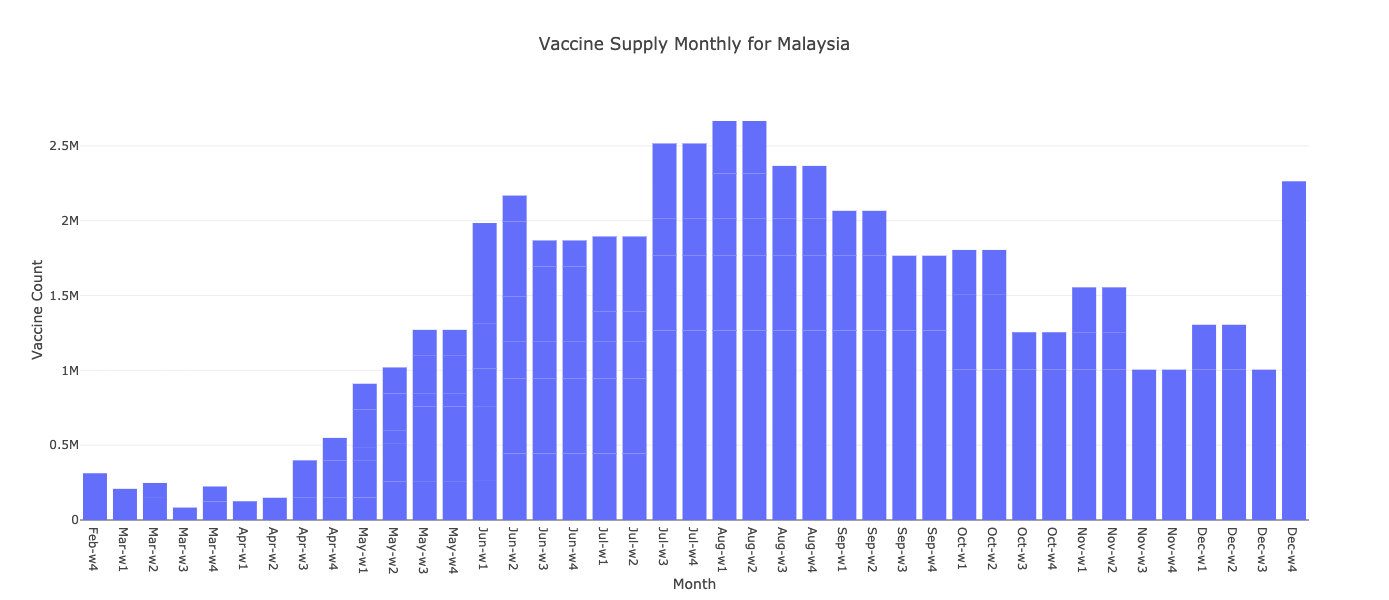

In [12]:
fig = px.bar(df_1, x="Month_Week",
             y='Dose',
             title="A Grouped Bar Chart With Plotly Express in Python",   
             height=600         
            )

fig.update_layout(title = "Vaccine Supply Monthly for Malaysia",
     xaxis_title = 'Month', yaxis_title = 'Vaccine Count', title_x=0.5, template="none",
     width = 1000, height = 600)

fig.show()